In [1]:
from torchvision import models

* С заглавной буквы - классы Python, реализующие модели (только архитектура, "чистый лист")
* В нижнем регистре - вспомогательные функции, возвращающие созданные на основе этих классов модели

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

## AlexNet

In [3]:
alexnet = models.AlexNet() # случайная неинициализированная сеть

## RexNet

In [4]:
from torchvision.models import ResNet101_Weights

resnet = models.resnet101(weights=ResNet101_Weights.DEFAULT) # свёрточная нейронная сеть из 101 слоя (нужен VPN)

In [5]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Обработка входного изображения

In [6]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256), # масштабирование до 256 на 256
    transforms.CenterCrop(224), # обрезка до 224 на 224 по центру
    transforms.ToTensor(), # преобразование в тензор
    transforms.Normalize( # нормализация цветовой компоненты
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

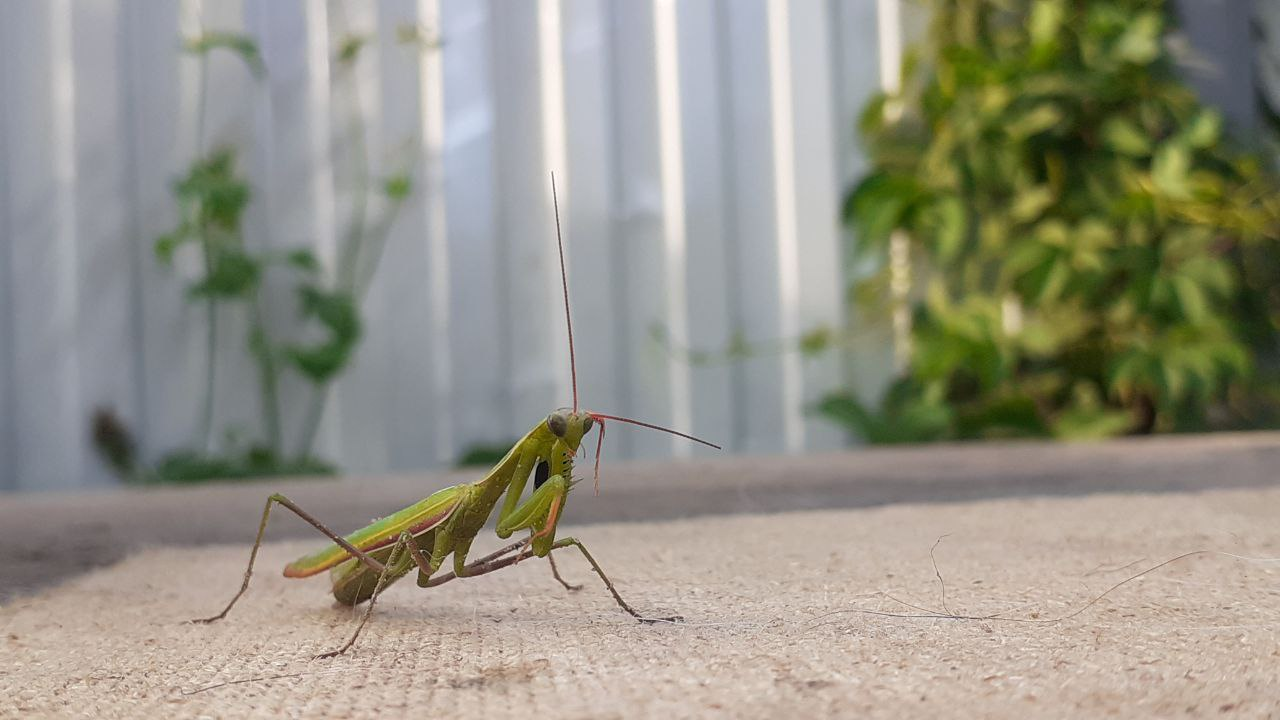

In [7]:
from PIL import Image
img = Image.open("/home/avtotka/Pictures/bagomol.jpg")
img

In [8]:
img_t = preprocess(img)

In [9]:
import torch
batch_t = torch.unsqueeze(img_t, 0) # добавление нового измерения изображения (видимо, для обработки нейросетью)

### Подача изображения на вход нейросети

In [10]:
resnet.eval() # перевод нейросети в режим eval для передачи предварительно обученной модели новых данных
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
out = resnet(batch_t) # получение вывода нейросети (1000 оценок для набора классов изображений)
out

tensor([[-1.8614e-01,  3.1949e-01,  1.1704e-01, -1.0409e-01,  7.0141e-02,
         -1.0252e-01, -4.4448e-01,  2.5735e-02, -1.2296e-02,  5.0140e-02,
         -5.1103e-01, -1.2560e-01, -5.5256e-02,  6.2679e-02, -3.3095e-02,
         -1.7518e-01,  2.1728e-01, -3.5428e-02, -1.9583e-01, -4.6140e-01,
         -2.8445e-01, -5.0622e-02,  5.2520e-02,  4.2337e-02, -1.4230e-01,
         -1.1456e-01, -3.7654e-02, -1.8492e-01, -3.3539e-01,  4.0197e-01,
         -2.7899e-01, -5.3582e-02, -2.4863e-01, -2.4543e-01,  9.1813e-02,
         -1.8277e-01,  4.2801e-01,  4.6264e-01, -3.5407e-01,  3.6631e-01,
          6.1759e-01,  2.6439e-01, -8.9021e-02,  1.9911e-01,  6.5125e-02,
         -2.4746e-01,  2.0977e-01,  6.7907e-02, -6.3260e-02, -1.2475e-01,
         -6.1656e-01,  1.3666e-01, -1.8330e-01,  6.4359e-02,  9.7261e-02,
          2.6623e-01,  8.2873e-02, -2.2413e-02, -2.8510e-01,  9.8950e-02,
         -1.3836e-01, -2.9483e-02, -3.2225e-01, -5.6468e-02, -1.9890e-01,
          2.0790e-01,  1.9780e-01, -6.

### Определение класса изображения

In [12]:
with open('/home/avtotka/dev/ai/pytorch/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1) # индекс самого вероятного описания

In [13]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 # нормализация входных сигналов и деление на сумму
labels[index[0]], percentage[index[0]].item() # наиболее вероятная оценка

('mantis, mantid', 46.89315414428711)

In [14]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('mantis, mantid', 46.89315414428711),
 ('grasshopper, hopper', 20.710145950317383),
 ('cricket', 5.625844955444336),
 ('walking stick, walkingstick, stick insect', 0.8743923902511597),
 ('leafhopper', 0.27171099185943604)]

# Игра GAN

In [15]:
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [16]:
netG = ResNetGenerator()
model_path = '/home/avtotka/dev/ai/pytorch/horse2zebra_0.4.0.pth' # весовые коэффициенты модели
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [17]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

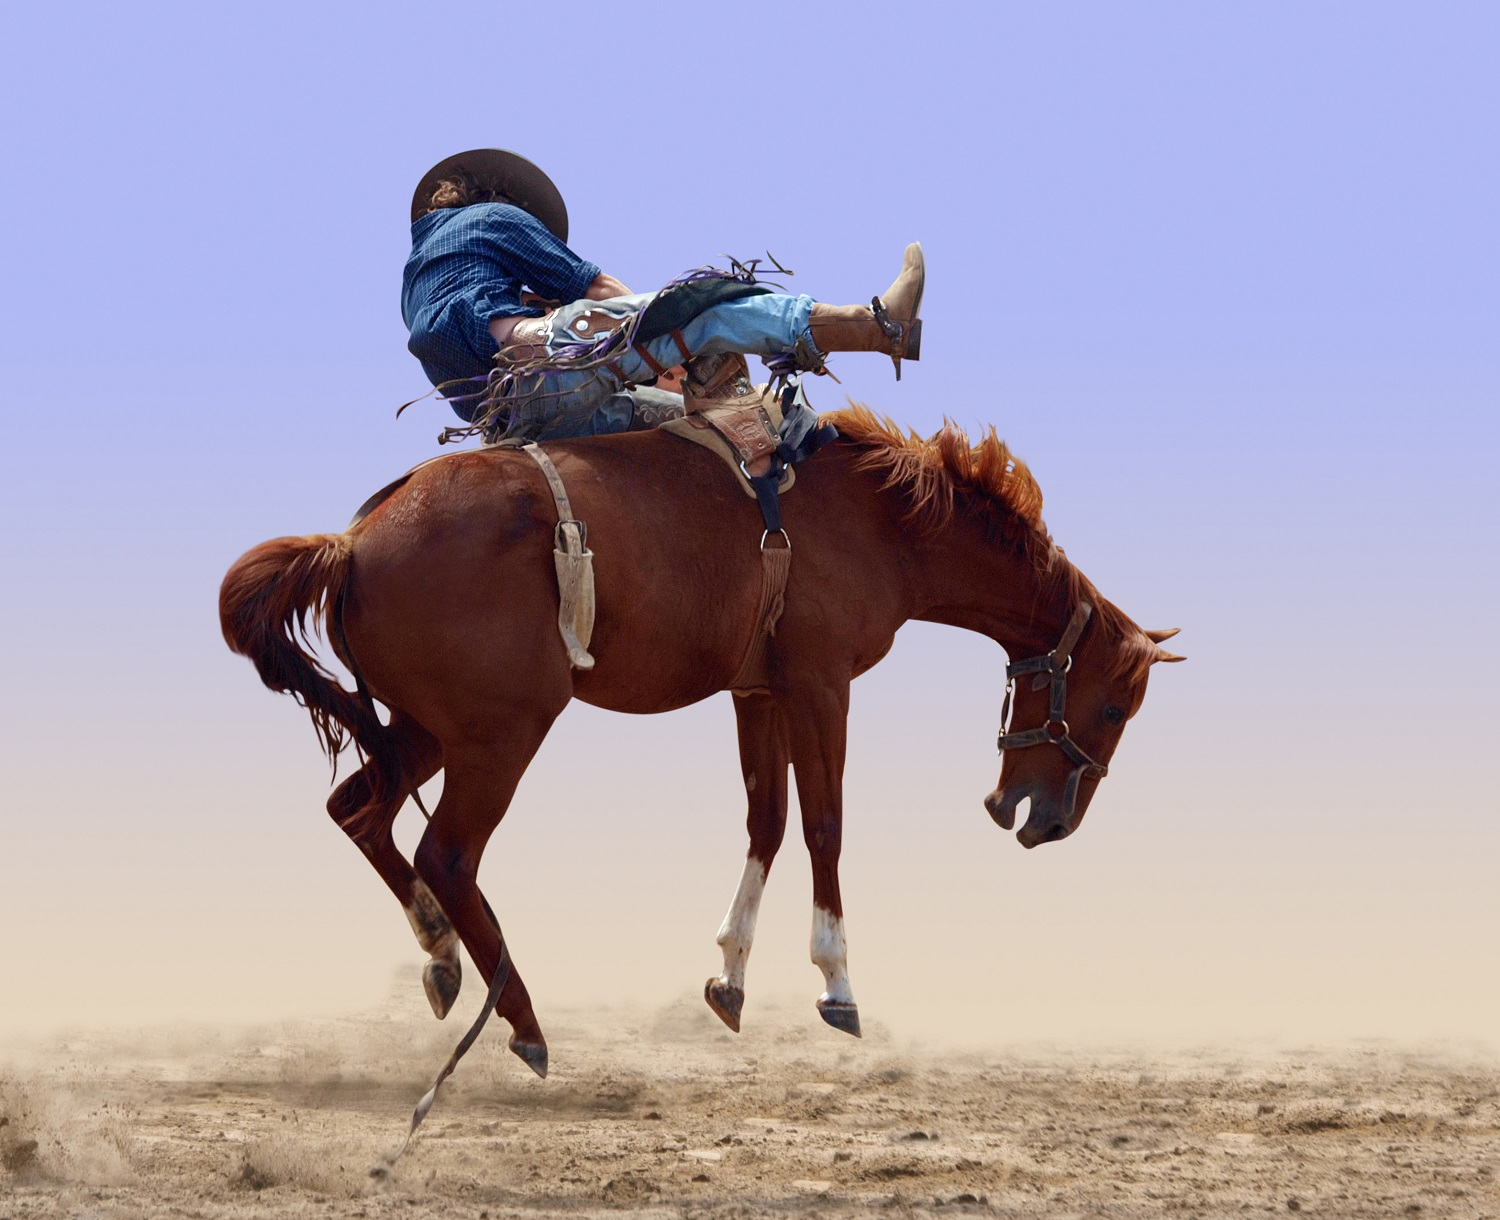

In [27]:
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])
img = Image.open('/home/avtotka/Pictures/rodeo_horse.jpg')
img

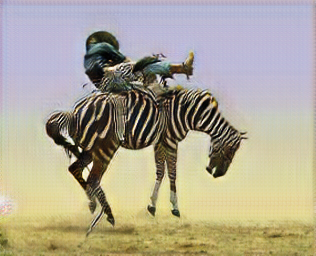

In [28]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)

# преобразование выхода обратно в изображение
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img

# Torch Hub

In [20]:
from torch import hub
from torchvision.models import ResNet18_Weights

resnet18_model = hub.load('pytorch/vision:main',
                          'resnet18',
                          weights=ResNet18_Weights.DEFAULT)

Using cache found in /home/avtotka/.cache/torch/hub/pytorch_vision_main


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/avtotka/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100.0%
